**Source : https://www.kaggle.com/shivan118/hranalysis**

# Importing Modules and Files

In [1366]:
# Modules needed
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np, math, warnings
from tqdm import tqdm_notebook
from scipy.stats import skew, median_absolute_deviation as mad
from IPython.display import Image
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:100% !important; }</style>"))
warnings.filterwarnings("ignore")

data = pd.read_csv("./train.csv")

print("Data structure :")
display(data.head(1))
print("Data length : ", len(data))

Data structure :


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0


Data length :  54808


**Headers Info**

These informations are not obtained from the data author since he gives no info at all. So, from logical reasoning I try to understand and define it by myself as following:
- employee_id : Employee unique number
- department : Department which employee works
- region : Company's region (city / province most likely) employee is placed
- education : Employee's last education
- gender : Gender
- recruitment_channel : The way company hired employee
- no_of_trainings : Number of training the employee has taken
- age : Age
- previous_year_rating : Employee's last year rating (is believed different from KPI)
- length_of_service : Years of employee's service
- KPIs_met >80%	: Either employee's KPI is above 80% or not (assumed per year)
- awards_won? : Number of awards employee has
- avg_training_score : Average of employee's training score
- is_promoted : Either the employee is promoted or not

# Business Problem

A success of a company is determined by two fundamental factors, business core and human resource quality. Those two factors are dependent and can't be seperated. Company can't implement a good business core without good human resource quality. So do a good quality of human resource means nothing without a clear and good understanding of company's business orientation.

Not only as business executor, human resource should be seen as company's asset too. Expected working environment can lead to employee's loyalty and better performance and thus lead to company's sustainability. But, this ideality couldn't be achieved easily. Altough it seems utopian and hypocrite to put employee's interest above company's, enhancing quality of human resource is still profitable than not. **Haryono, Supardi, and Udin in their research on 2020** states that a good management on human resource's quality will significantly **increase their job performance and work motivation**. Hence, working quality and effectiveness will also increase.

Problems on managing and increasing employee's quality are various. **Forbes on one of their article** says that one of them is "lack of recourse for poor performance". The point concludes reward and recognition of contributions as the main factors. Later it states:

>"If this isn’t happening, or worse, people doing mediocre work are getting the same treatment as strong performers, it’s natural to just turn off and do your job on autopilot. Companies that don’t deal with performance issues bring down the average for everyone."

Same point also delivered by **Michael Page, an international recruitment firm, on one of its article**. Feeling under - valued (company fails to appreciate and reward employee's accomplishments and contributions) can lead to employee's low energy and commitment in their role.

>"It’s important to celebrate successes and give credit where credit’s due. Try to make sure that achievements are rewarded – even if it’s just with a pat on the back."

Haryono et al. (2020) argue that there's at least three ways company could give to improve their employee's performance. They are training, work motivation and **job promotion**. In this context, we will focus only on job promotion. **Robbins and Judge (2013) in Haryono et al (2020).** state that job promotion will provide opportunities for personal growth, more responsibility, and increased social status. If job promotion is good, it provides satisfaction to employees. Hence, job promotion is a strong stimulus to increase employee's performance and satisfaction.

With 215 respondents collected from the South Lampung Regency National Education Office and using second-order Structural Equation Modeling (SEM) -- with the help of Amos 24.0 --, Haryono et al. (2020) conclude that job promotion has **a positive and significant effect on work motivation**. This finding support previous studies by Asaari et al. (2019), Ddamulira Sseruyange (2009) and Gathungu et al. (2015).

![title](hyp_testing.jpg)


**IMPORTANT NOTE :
The authors possibly put the H2 t - value incorrectly because they conclude H1 t - value is 3.178 and H2 t - value is 8.267. However, it doesn't set aside the big picture (concluded t - value > 1.96).**

Those base understandings is expected to make us realize **how important it is to reward employees by job promotion**.

Here, we have data showing 54.808 observations from unknown company.

**References:**
- Forbes. (2014, Jan 20th). *8 Common Causes Of Workplace Demotivation*. Accessed on November, 12th 2020 through https://www.forbes.com/sites/work-in-progress/2014/01/20/8-common-causes-of-workplace-demotivation/?sh=7ae763c42c6d.
- Michael Page. *Seven reasons for employee demotivation*. Accessed on November, 12th 2020 through https://www.michaelpage.co.uk/advice/management-advice/development-and-retention/seven-reasons-employee-demotivation.
- Haryono, Siswoyo et al. 2020. *The effect of training and job promotion on work motivation and its implications on job performance: Evidence from Indonesia*. Research Gate : Management Science Letters. Accessed through https://www.researchgate.net/publication/339598458_The_effect_of_training_and_job_promotion_on_work_motivation_and_its_implications_on_job_performance_Evidence_from_Indonesia.

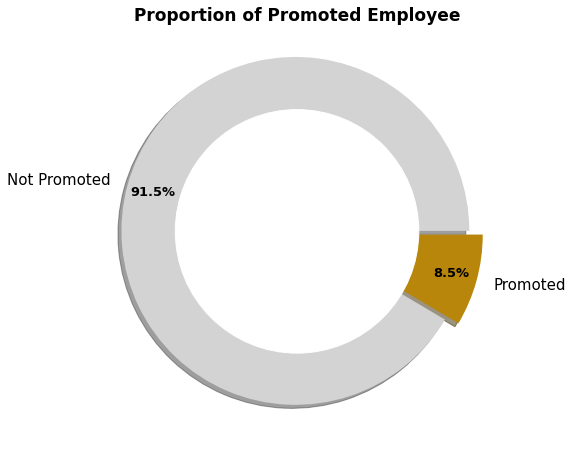

In [1367]:
# Showing promoted employee proportion
fig, promotedEmp = plt.subplots()
innerCircle = plt.Circle((0, 0), 0.7, color = "white")

plt.rcParams["figure.figsize"] = (8, 8)
percentage, label, chart = promotedEmp.pie(
        data.groupby("is_promoted").count()["gender"],
        colors = ["lightgrey", "darkgoldenrod"],
        labels = ["Not Promoted", "Promoted"],
        shadow = True,
        textprops = {"size" : 15,"color" : "black", "weight" : "normal"},
        radius = 1,
        autopct = "%1.1f%%",
        labeldistance = 1.1,
        pctdistance = 0.85,
        explode = (.01, 0.07)
       )
plt.gcf().gca().add_artist(innerCircle)
plt.setp(chart, **{"color" : "black", "weight" :"bold", "fontsize" : 13})
plt.title("Proportion of Promoted Employee", fontdict = {'fontsize': 17,
        'fontweight' : "bold",
        'color' : "black",
        'verticalalignment': 'baseline',
        'horizontalalignment': "center"
        }, y = 0.97)

plt.show()

Chart above shows us a slight proportion of promoted employee. This is make sense since job promotion isn't easy as it looks. The management (HR Department) should consider many aspects of empoloyees before deciding to promote them. Because if not, **company will suffer ineffectiveness of work management**. According to **Kinicki and Fugate (2017) in Haryono et al. (2020)**, job promotion occurs when an employee moves from one job to another, which is higher in payment, **responsibility** and level. It means that if incompetent employee got promoted then there's a big possibility they would struggle in bigger responsibility. As stated before, it can lead to drop of work quality. Therefore, the management should choose employees carefully.

There's no textbook consideration for every company. Even different departments have different formula.Hence, from this data we must find a pattern to be able to predict which employee is worth a promotion. Because if not, the decent employee could feel under - valued and thus lead to demotivation and ends in performance drop. Company could suffer from this (drops in workload an employee can handled, unfulfilled deadline, drops in report quality, etc.).

# Goals

Find which features affecting promotion decision the most and build a model to predict which employee should be promoted. The deployed model later will be useful for **HR Department team**. Thus, questions we want to answer are:
- How does every features affect the decision?
- What model suits our goal the best?
- Why the model suits the best?

# Variables Overview

In [1368]:
# Data description
dataDesc = []
for x in data.columns:
    dataDesc.append([
        x,
        data[x].dtypes,
        data[x].isnull().sum(),
        round((((data[x].isnull().sum()) / (len(data))) * 100), 2),
        len(data[x].unique()),
        data[x].drop_duplicates().sample(2).values
    ])

print("Variables description :")
display(pd.DataFrame(data = dataDesc, columns = [
    "Columns Name",
    "Data Type",
    "NULL",
    "NULL Percentage",
    "Unique",
    "Unique Samples"
]))

Variables description :


,Columns Name,Data Type,NULL,NULL Percentage,Unique,Unique Samples
0,employee_id,int64,0,0.00,54808,"[55321, 32159]"
1,department,object,0,0.00,9,"[Analytics, Procurement]"
2,region,object,0,0.00,34,"[region_1, region_20]"
3,education,object,2409,4.40,4,"[Bachelor's, Master's & above]"
4,gender,object,0,0.00,2,"[m, f]"
5,recruitment_channel,object,0,0.00,3,"[sourcing, other]"
6,no_of_trainings,int64,0,0.00,10,"[5, 9]"
7,age,int64,0,0.00,41,"[35, 20]"
8,previous_year_rating,float64,4124,7.52,6,"[2.0, 3.0]"
9,length_of_service,int64,0,0.00,35,"[30, 11]"


We have many missing values in **education** and **previous_year_rating**.

**Handling missing values**

- For education, we will fill them using mode based on others **department, age, and length_of_service**. We will elaborate each variables to see if they have any impact to education.

In [1369]:
# Education distribution per departments
print("Education distribution (%) per departments :")
temp = round((pd.crosstab(data["department"], data["education"], normalize = "index") * 100), 1)
temp.columns.name = ""
temp.index.name = "Departments"
display(temp)

Education distribution (%) per departments :


,Bachelor's,Below Secondary,Master's & above
Departments,,,
Analytics,79.3,0.0,20.7
Finance,75.8,4.2,20.0
HR,63.9,5.4,30.7
Legal,78.6,6.3,15.1
Operations,70.0,1.6,28.5
Procurement,62.2,1.8,36.0
R&D,55.8,0.0,44.2
Sales & Marketing,72.7,0.0,27.3
Technology,65.9,2.9,31.2


Each departments required certain educational level, so we shouldn't drop the missing values. Analytics and R&D department for example, they only allow employees with at least bachelor's degree to join. On the other hand, e.g Legal and HR department accept them.

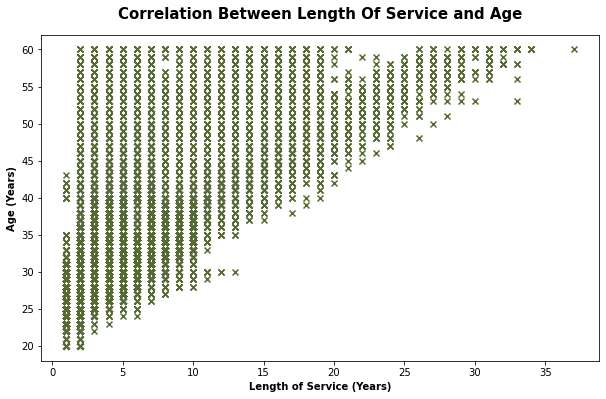

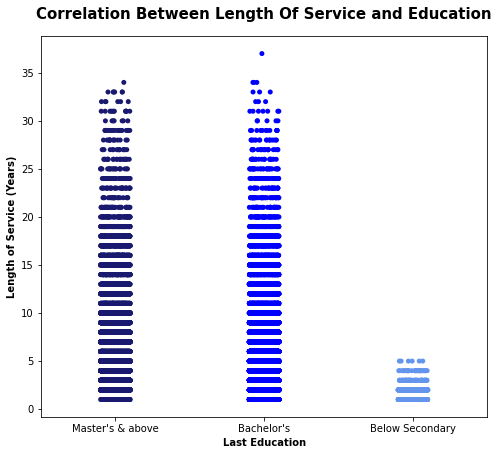

In [1370]:
# Correlation between length of service and age
plt.figure(figsize = (10, 6))
plt.scatter(data["length_of_service"], data["age"], color = "darkolivegreen", marker = "x")
plt.title(
        "Correlation Between Length Of Service and Age", fontdict = {'fontsize': 15,
        'fontweight' : "bold",
        'color' : "black",
        'verticalalignment': 'baseline',
        'horizontalalignment': "center"
        }, y = 1.03
    )
plt.xlabel(
    "Length of Service (Years)",
    fontdict = {
        "weight" : "bold",
        "size" : 10
    }
    )
plt.ylabel(
    "Age (Years)",
    fontdict = {
        "weight" : "bold",
        "size" : 10
    }
    )

plt.show()

print("\n")

# Correlation between education and length of serive
plt.figure(figsize = (8, 7))
sns.stripplot(data["education"], data["length_of_service"], jitter = True, palette = ["midnightblue", "blue", "cornflowerblue"])
plt.title(
        "Correlation Between Length Of Service and Education", fontdict = {'fontsize': 15,
        'fontweight' : "bold",
        'color' : "black",
        'verticalalignment': 'baseline',
        'horizontalalignment': "center"
        }, y = 1.03
    )
plt.xlabel(
    "Last Education",
    fontdict = {
        "weight" : "bold",
        "size" : 10
    }
    )
plt.ylabel(
    "Length of Service (Years)",
    fontdict = {
        "weight" : "bold",
        "size" : 10
    }
    )

plt.show()

Turns out age has a positive correlation with length of serive. So, instead of using age, we can **just use length of service** to determine correlation with eduaction.

The graph above shows us that employees with lower length of service time tend to have lower educational level --vice versa--.

In [1371]:
# Filling missing values in education
for x in tqdm_notebook(data[data["education"].isna()].index):
    res = data[(data["department"] == data["department"][x]) & (data["length_of_service"] == data["length_of_service"][x])]["education"].mode()[0]

    data["education"][x] = res

- Meanwhile, for previous year rating we will fill them using mode based on others **KPIs_met >80%, no_of_trainings, awards_won?, and avg_training_score**. We will elaborate each variables to see if they have any impact to previous year rating.

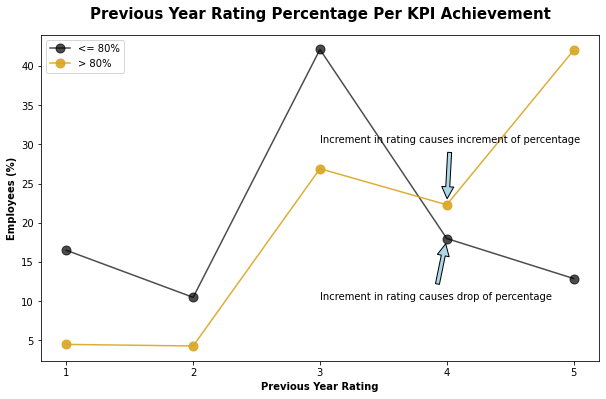

In [1372]:
# Correlation between previous year rating and KPI achievement
temp = round((pd.crosstab(data["KPIs_met >80%"], data["previous_year_rating"], normalize = "index") * 100), 1)

plt.figure(figsize = (10, 6))
plt.plot(temp.loc[0], color = "black", alpha = 0.7, marker = "o", markersize = 9)
plt.plot(temp.loc[1], color = "goldenrod", alpha = 0.9, marker = "o", markersize = 9)
plt.title(
        "Previous Year Rating Percentage Per KPI Achievement", fontdict = {'fontsize': 15,
        'fontweight' : "bold",
        'color' : "black",
        'verticalalignment': 'baseline',
        'horizontalalignment': "center"
        }, y = 1.03
    )
plt.xlabel(
    "Previous Year Rating",
    fontdict = {
        "weight" : "bold",
        "size" : 10
    }
    )
plt.ylabel(
    "Employees (%)",
    fontdict = {
        "weight" : "bold",
        "size" : 10
    }
    )
plt.legend(("<= 80%", "> 80%"))
plt.xticks((1, 2, 3, 4, 5))
plt.annotate("Increment in rating causes drop of percentage",
            xy = (4, 18),
            xytext = (3, 10),
            fontsize = 10,
            arrowprops = {"facecolor" : "lightblue", "shrink" : 0.1},
            horizontalalignment = "left", verticalalignment = 'bottom')
plt.annotate("Increment in rating causes increment of percentage",
            xy = (4, 22.3),
            xytext = (3, 30),
            fontsize = 10,
            arrowprops = {"facecolor" : "lightblue", "shrink" : 0.1},
            horizontalalignment = "left", verticalalignment = 'bottom')


plt.show()

KPI achievement determines the likelihood of previous year rating. If an employee has KPI above 80%, then there's bigger possibility that he had a high previous year rating compared to those who doesn't. Employees with KPI below 80% centralized on rating 3, meanwhile employees with KPI above 80% have higher percentage of ratingg 4 and 5.

In [1373]:
# Correlation between number of trainings and previous year rating
print("Previous year rating percentage per number of trainings :")
temp = round((pd.crosstab(data["previous_year_rating"], data["no_of_trainings"], normalize = "index") * 100), 1)
temp.columns.name = "Number of Trainings"
temp.index = [1, 2, 3, 4, 5]
temp.index.name = "Previous Year Rating (%)"
display(temp)

# Correlation between winning awards and previous year rating
print("\n\nPrevious year rating percentage per achievement in winning awards :")
temp = round((pd.crosstab(data["previous_year_rating"], data["awards_won?"], normalize = "index") * 100), 1)
temp.columns = ["No", "Yes"]
temp.columns.name = "Awards Won?"
temp.index = [1, 2, 3, 4, 5]
temp.index.name = "Previous Year Rating (%)"
display(temp)

Previous year rating percentage per number of trainings :


Number of Trainings,1,2,3,4,5,6,7,8,9,10
Previous Year Rating (%),,,,,,,,,,
1,78.2,15.9,4.1,1.2,0.4,0.2,0.0,0.0,0.0,0.0
2,83.0,12.8,2.9,0.9,0.2,0.0,0.0,0.0,0.0,0.0
3,78.3,16.4,3.9,1.0,0.3,0.1,0.0,0.0,0.0,0.0
4,84.0,12.5,2.6,0.6,0.2,0.1,0.0,0.0,0.0,0.0
5,84.4,12.9,2.3,0.4,0.1,0.0,0.0,0.0,0.0,0.0




Previous year rating percentage per achievement in winning awards :


Awards Won?,No,Yes
Previous Year Rating (%),,
1,98.2,1.8
2,98.3,1.7
3,97.8,2.2
4,97.7,2.3
5,96.9,3.1


Turns out number of trainings doesn't affect previous year rating. Thus we **won't use** this variable. Meanwhile, if an employee won awards in previous time, the probability he gets high previous year rating is higher than those who doesn't. Employees who doesn't won awards are most likely to have low previous year rating.

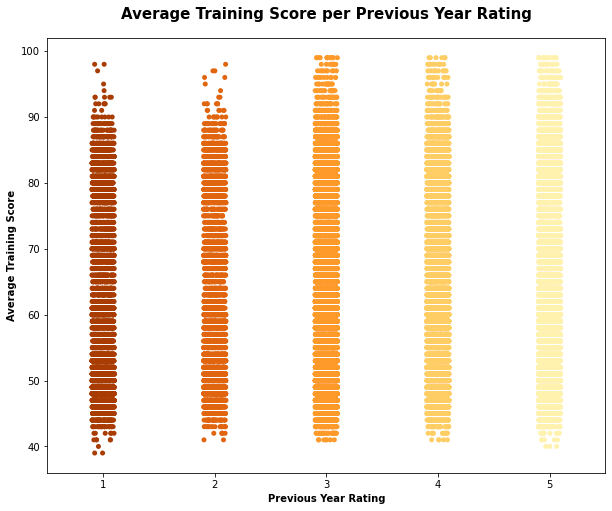

In [1374]:
# Correlation between average training score and previous year rating
plt.figure(figsize = (10, 8))
sns.stripplot(data["previous_year_rating"], data["avg_training_score"], jitter = True, palette = "YlOrBr_r")
plt.title(
        "Average Training Score per Previous Year Rating", fontdict = {'fontsize': 15,
        'fontweight' : "bold",
        'color' : "black",
        'verticalalignment': 'baseline',
        'horizontalalignment': "center"
        }, y = 1.03
    )
plt.xlabel(
    "Previous Year Rating",
    fontdict = {
        "weight" : "bold",
        "size" : 10
    }
    )
plt.ylabel(
    "Average Training Score",
    fontdict = {
        "weight" : "bold",
        "size" : 10
    }
    )
plt.xticks((0, 1, 2, 3, 4), (1, 2, 3, 4, 5))

plt.show()

We can see that higher average training score tends to lead to higher previous year rating.

In [1375]:
# Filling missing values in previous_year_rating
# Since the data is small, it's still okay to use indexing
for x in tqdm_notebook(data[data["previous_year_rating"].isna()].index):
    res = data[
          (data["KPIs_met >80%"] == data["KPIs_met >80%"][x])
          & (data["awards_won?"] == data["awards_won?"][x])
          & (data["avg_training_score"] == data["avg_training_score"][x])
          ]["previous_year_rating"].mode()[0]

    data["previous_year_rating"][x] = res

# Distribution, Outliers, and Correlation

In [1376]:
# Quantitative report
print("Data report for quantitative variables:")
display(data.describe())

Data report for quantitative variables:


,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.355459,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.242746,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


The data looks clean with no common anomaly (no 0 as value in non - categorical variables).

At first glance, we can see that **age** and **length_of_service** has outliers by simply looking on the gap of Q3 and maximum value. To ensure this we will look deeper to those variables and the others.

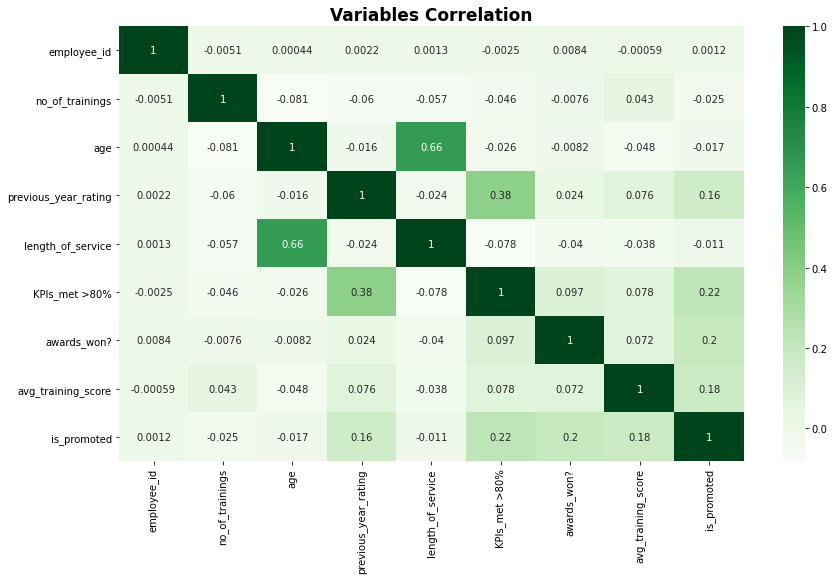

In [1377]:
# Correlation
plt.figure(figsize = (14, 8))
sns.heatmap(data.corr(), annot = True, cmap = "Greens")
plt.title("Variables Correlation", fontdict = {'fontsize': 17,
        'fontweight' : "bold",
        'color' : "black",
        'verticalalignment': 'baseline',
        'horizontalalignment': "center"
        })

plt.show()

This is a correlation of **unprocessed data**. We shall look correlation of each variables in accordance to **is_promoted** as our target. Nothing looks fancy at first. The highest value is just 0.2, which is belong to KPIs achievement and winning awards. Meanwhile, others are so low correlate to promotion decision. However, this isn't mean we can just drop them from our features. We will look deeper to each variables and, if needed, perform binning or recategorize to obtain better data understanding.

## Education

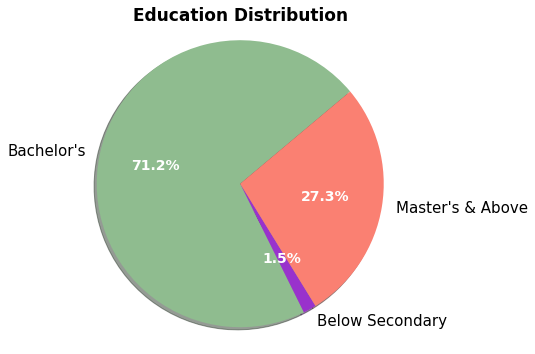

In [1378]:
# Distribution
fig, eduDist = plt.subplots(figsize = (8, 6)) # subplots is used to set color, size, and style for percentage and label respectively
percentage, label, chart = eduDist.pie(
        data.groupby("education").count()["age"],
        labels = ["Bachelor's", "Below Secondary", "Master's & Above"],
        autopct = "%1.1f%%",
        startangle = 40,
        colors = ["darkseagreen", "darkorchid", "salmon"],
        textprops = {"size" : 15,"color" : "black"},
        radius = 1.1,
        shadow = True
    )

plt.setp(chart, **{"color" : "white", "weight" :"bold", "fontsize" : 14})
plt.title("Education Distribution", fontdict = {'fontsize': 17,
        'fontweight' : "bold",
        'color' : "black",
        'verticalalignment': 'baseline',
        'horizontalalignment': "center"
        }, y = 0.98)

plt.show()

Majority of employees have Bachelor's degree but not Master's. Meanwhile, only few of them didn't make it to college.

In [1379]:
# Correlation between education and job promotion
print("Proportion of promoted employees based on education :")
temp = round((pd.crosstab(data["education"], data["is_promoted"], normalize = "index") * 100), 1).rename(columns = {
    0 : "Not Promoted", 1 : "Promoted"
})
temp.columns.name = ""
temp.index.name = "Education"
display(temp)

Proportion of promoted employees based on education :


,Not Promoted,Promoted
Education,,
Bachelor's,92.0,8.0
Below Secondary,91.7,8.3
Master's & above,90.2,9.8


It's interesting how bachelor's proportion of promoted is lower than below secondary group. This means level of education not guarantee employee's chance to be promoted, although the difference is very small (0.3%). But, is that even possible happen in all departments? Is there any departments that set certain educational level border?

Percentage of promoted employees per education per department :



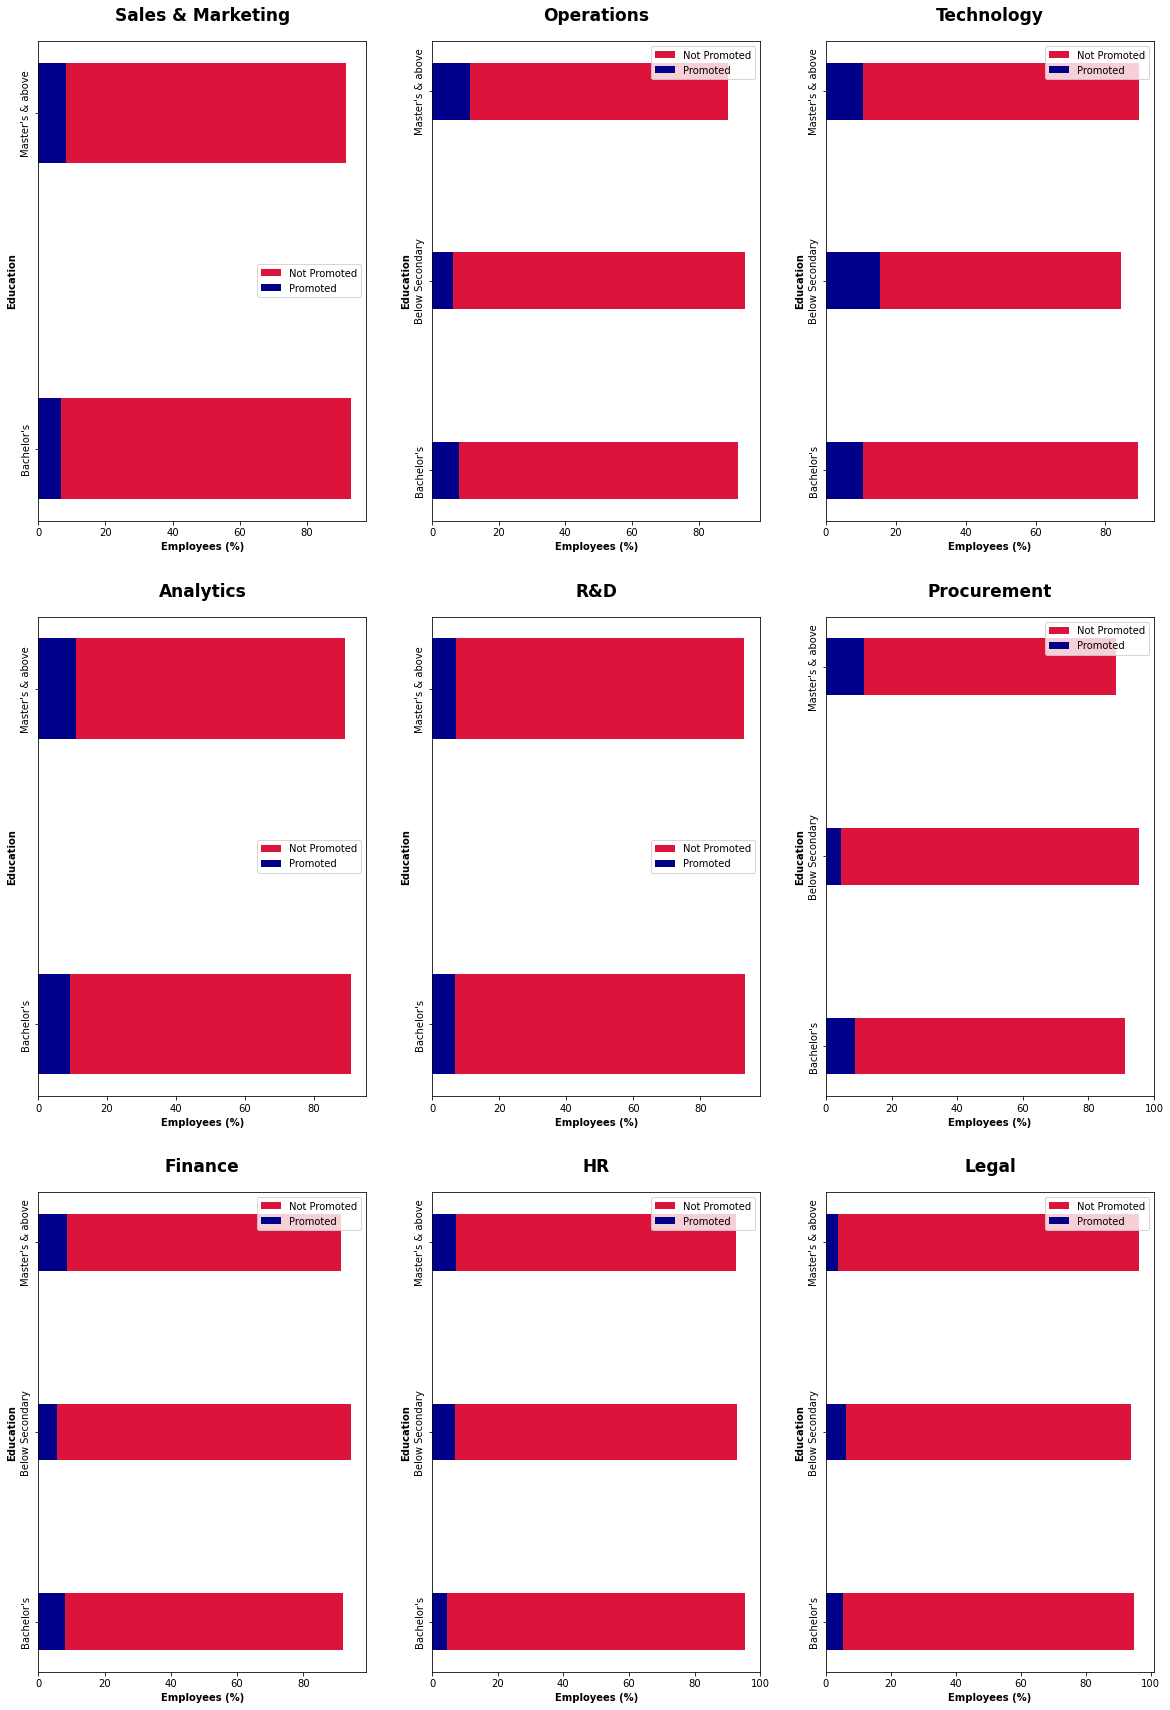

In [1380]:
# Correlation between education, department, and job promotion
temp, row, col = round((pd.crosstab([data["department"], data["education"]], data["is_promoted"], normalize = "index") * 100), 1), 0, 0

print("Percentage of promoted employees per education per department :\n")
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (20, 30))
for x in data["department"].unique(): 
    if col > 2:
        col = 0
        row += 1
        
    ax[row][col].barh(temp.loc[x].index, width = temp.loc[x][0], height = 0.3, color = "crimson")
    ax[row][col].barh(temp.loc[x].index, width = temp.loc[x][1], height = 0.3, color = "darkblue")
    ax[row][col].set_title(
    f"{x}", fontdict = {'fontsize': 17,
    'fontweight' : "bold",
    'color' : "black",
    'verticalalignment': 'baseline',
    'horizontalalignment': "center"
    }, y = 1.03)
    ax[row][col].set_xlabel(
        "Employees (%)",
        fontdict = {
            "size" : 10,
            "weight" : "bold"
        }
        )
    ax[row][col].set_ylabel(
        "Education",
        fontdict = {
            "size" : 10,
            "weight" : "bold"
        }
        )
    ax[row][col].legend(("Not Promoted", "Promoted"))
    ax[row][col].set_yticklabels((temp.loc[x].index), rotation = 90, fontdict = {
         'verticalalignment': "center"
    })
    
    col += 1

We can see that employee with Master's degree & above has higher chance of being promoted rather than those with lower degree **based on department**. It means that the higher employee's educational level is, the higher his probability of being promoted on almost all departments (some has small gap with bachelor's, some has quite big gap). But, this condition doesn't applied in Technology and Legal Department. Turns out, high percentage of below secondary that we see earlier centralized in these two departments. They give employees with below secondary school grade higher probability of being promoted. This could be an important pattern for the model later, since it indicates difference of promotion proportion in certain departments. It means even though someone is a master's, but he work on Technology department, there's still higher chance a below secondary employee is getting promoted than him.

In [1381]:
# Encode education for model purpose later
eduInt = []
for x in data["education"]:
    if x == "Below Secondary":
        eduInt.append(0)
    elif x == "Bachelor's":
        eduInt.append(1)
    else:
        eduInt.append(2)

data["eduInt"] = eduInt

## Departments

In [1382]:
# Distribution
print("Departments distribution :")
temp = data.groupby("department").count()[["gender"]].rename(
    columns = {
        "gender" : "Count"
        }
    )
temp.index.name = "Departments"
display(temp.sort_values("Count", ascending = False))

Departments distribution :


,Count
Departments,
Sales & Marketing,16840
Operations,11348
Procurement,7138
Technology,7138
Analytics,5352
Finance,2536
HR,2418
Legal,1039
R&D,999


Sales & Marketing has the most employees across all departments. Meanwhile, Legal and R&D are the lowest. It gives us the big picture of company profile. Most likely the company runs as a client - based business with data processing service.

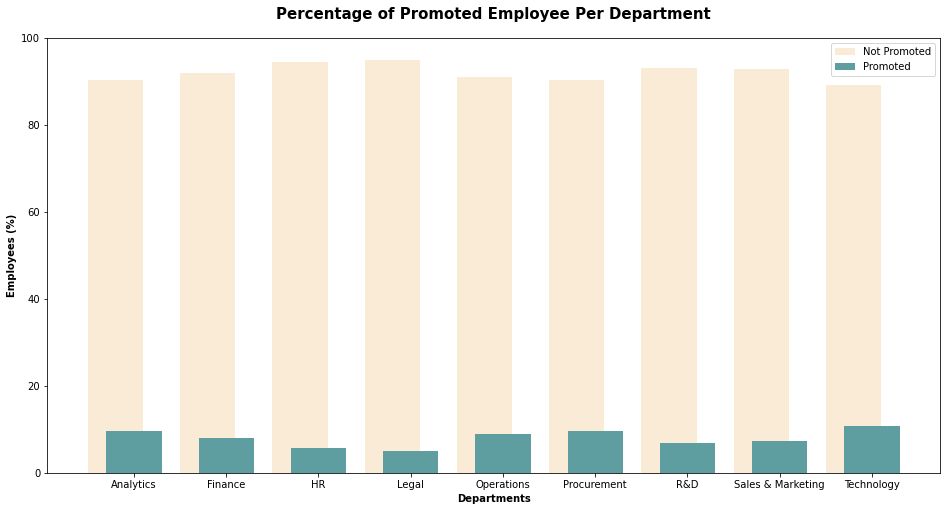

In [1383]:
# Correlation between department and job promotion
temp = round((pd.crosstab(data["department"], data["is_promoted"], normalize = "index") * 100), 1)
temp["index"] = [x for x in range(len(temp.index))]

plt.figure(figsize = (16, 8))
plt.bar(temp["index"] - .2, temp[0], color = "antiquewhite", width = 0.6)
plt.bar(temp["index"], temp[1], color = "cadetblue", width = 0.6)
plt.xticks(([x for x in temp["index"]]), ([y for y in temp.index]))
plt.legend(("Not Promoted", "Promoted"))
plt.title(
        "Percentage of Promoted Employee Per Department", fontdict = {'fontsize': 15,
        'fontweight' : "bold",
        'color' : "black",
        'verticalalignment': 'baseline',
        'horizontalalignment': "center"
        }, y = 1.03
    )
plt.xlabel(
    "Departments",
    fontdict = {
        "weight" : "bold",
        "size" : 10
    }
    )
plt.ylabel(
    "Employees (%)",
    fontdict = {
        "weight" : "bold",
        "size" : 10
    }
    )
plt.ylim(0, 100)

plt.show()

Turns out department **itself** doesn't give significant impact on the target. All departments have quite the same proportion, so we can conlude that departments don't correlate with job promotion. But, department **with education** do effect the promotion. Hence, we won't drop this feature, but create a new binary feature stating either the employee is from Legal or Technology Department. But, we also still use department variable as it is to control the prediction better because there's strong personal belief that different departments will always have different approach to their employees. On the other side, we can see that even Sales & Marketing deparment has the most employees, its proportion of promoted employee is still lower than Technology's and Analytics's. This strengthen our assumption that the company runs in data processing service (puts data-related departments on a **slight higher concern**).

In [1384]:
# Create new binary feature
isTechLegal = []
for x in data["department"]:
    if (x == "Technology") or (x == "Legal"):
        isTechLegal.append(1)
    else:
        isTechLegal.append(0)
        
data["isTechLegal"] = isTechLegal

## Regions

In [1385]:
# Removing "region_" from region to visualize better
data["region"] = data["region"].apply(lambda x : int(x.replace("region_", "")))

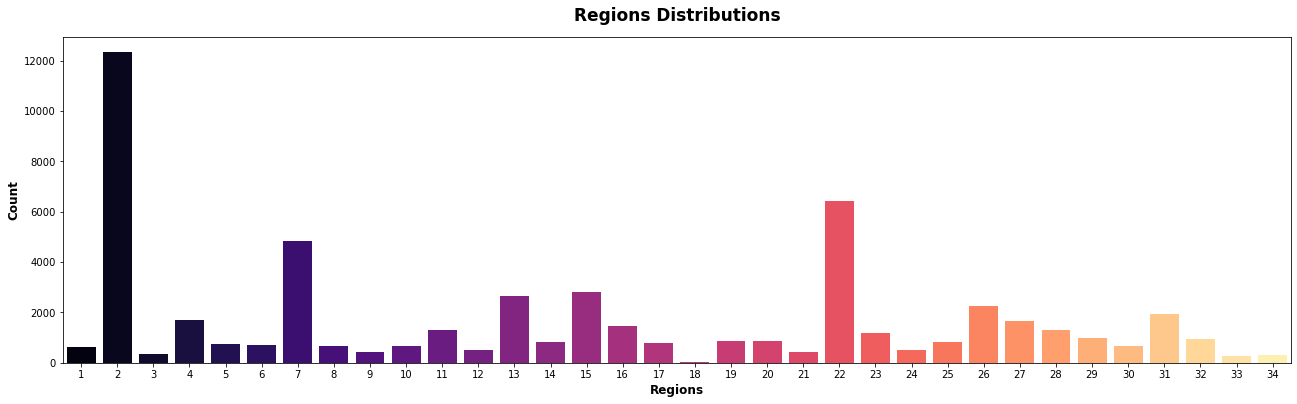

In [1386]:
# Distribution
plt.figure(figsize = (22, 6))
sns.countplot(data.sort_values("region")["region"], palette = "magma", saturation = 1.5)
plt.title(
        "Regions Distributions", fontdict = {'fontsize': 17,
        'fontweight' : "bold",
        'color' : "black",
        'verticalalignment': 'baseline',
        'horizontalalignment': "center"
        }, y = 1.03
    )
plt.xlabel(
    "Regions",
    fontdict = {
        "weight" : "bold",
        "size" : 12
    }
    )

plt.ylabel(
    "Count",
    fontdict = {
        "weight" : "bold",
        "size" : 12
    }
    )

plt.show()

Region 2 has the most employees. Most likely the region is the center / main office of the company. On the other hand, Region 18 is the lowest alongwith region 33 and 34. It indicates that these regions are:
- Newly opened or
- Doens't give that much contribution or
- Has few clients or
- Specially designed as hardware / operational warehouse

thus company won't place many employees there.

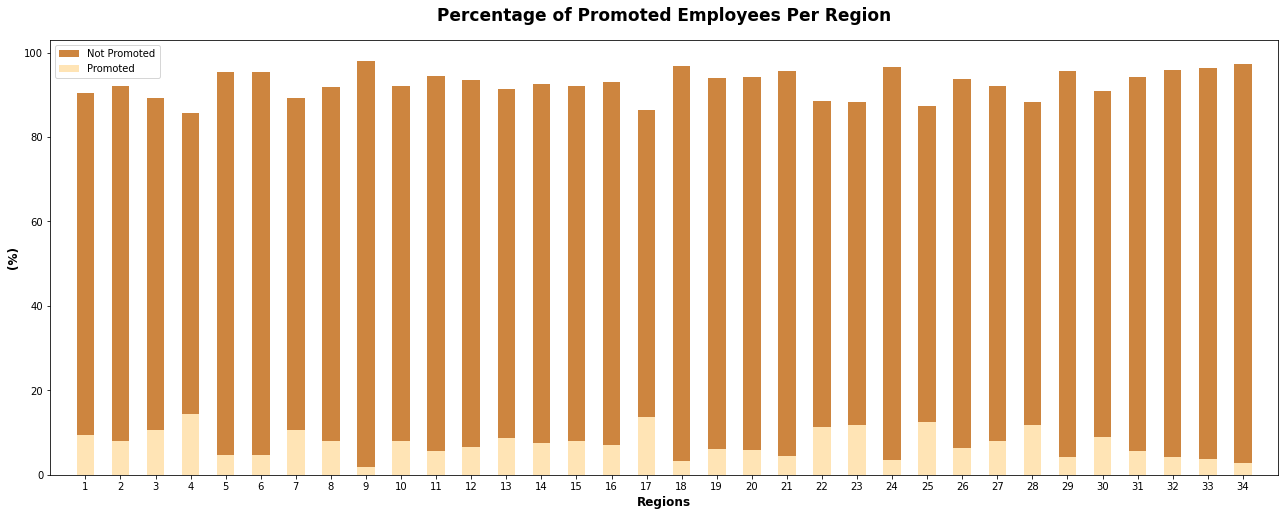

In [1387]:
# Correlation between regions and job promotion
plt.figure(figsize = (22, 8))
temp = round((pd.crosstab(data.sort_values("region")["region"], data.sort_values("region")["is_promoted"], normalize = "index") * 100), 1)
plt.bar(temp.index, temp[0], color = "peru", width = 0.5)
plt.bar(temp.index, temp[1], color = "moccasin", width = 0.5)
plt.title(
        "Percentage of Promoted Employees Per Region", fontdict = {'fontsize': 17,
        'fontweight' : "bold",
        'color' : "black",
        'verticalalignment': 'baseline',
        'horizontalalignment': "center"
        }, y = 1.03
    )
plt.xlabel(
    "Regions",
    fontdict = {
        "weight" : "bold",
        "size" : 12
    }
    )
plt.ylabel(
    "(%)",
    fontdict = {
        "weight" : "bold",
        "size" : 12
    }
    )
plt.xticks(
        ([x for x in range(1, len(data["region"].unique()) + 1)]),
        [x for x in (data.sort_values("region")["region"].unique())])
plt.legend(("Not Promoted", "Promoted"))
plt.xlim(0, 35)

plt.show()

There's significant difference in promoted proportion for some regions, e.g. Region 9, 18, 24, and 29. So what's up with these regions?

In [1388]:
# Using mean of all promoted percentage per regions to create threshold
thres = round((pd.crosstab(data.sort_values("region")["region"], data.sort_values("region")["is_promoted"], normalize = "index") * 100), 1).reset_index()
thres = thres[thres[1] < thres[1].mean()]

temp = round((pd.crosstab(data["region"], data["KPIs_met >80%"], normalize = "index") * 100), 1).rename(columns = {
    0 : "Below 80%", 1 : "Above 80%"
})
temp.columns.name = ""
temp.index.name = "Region"

print("ABOVE threshold regions percentage of KPIs achievement :")
display(temp[~(temp.index.isin(thres["region"]))])

print("\nBELOW threshold regions percentage of KPIs achievement :")
display(temp[temp.index.isin(thres["region"])])

ABOVE threshold regions percentage of KPIs achievement :


,Below 80%,Above 80%
Region,,
1,61.0,39.0
2,65.2,34.8
3,63.0,37.0
4,56.2,43.8
7,64.0,36.0
8,58.9,41.1
10,69.9,30.1
13,63.9,36.1
14,65.3,34.7



BELOW threshold regions percentage of KPIs achievement :


,Below 80%,Above 80%
Region,,
5,76.1,23.9
6,69.3,30.7
9,81.2,18.8
11,64.7,35.3
12,65.8,34.2
16,67.4,32.6
18,93.5,6.5
19,68.8,31.2
20,66.0,34.0


After we create a threshold, which is the mean of all regions promoted percentage, we found 17 regions below it. Those regions turn up have lower proportion of employees who have KPIs above 80% if we compared to regions above threshold. KPIs itself is a certain parameter to assess employee's performance for certain time. Lower KPIs (in this case below 80%) means bad performance and bad performance leads to promotion decision. Meanwhile, the other non-17 regions has a higher rate of good perform employees on average and as a result causes higher of promoted employees.

The model could leverage this variable to predict more accurate. Thus, we will keep it. But, we won't use this variable as it is. We will create a new binary column to state either an employee is belong to the 17 regions or not. 

In [1389]:
# Create new binary feature
belowReg = temp[temp.index.isin(thres["region"])].index
isBelowReg = [1 if x in belowReg else 0 for x in data["region"]]
data["isBelowReg"] = isBelowReg

In [1139]:
# Removes region
data.drop("region", 1, inplace = True)

## Gender

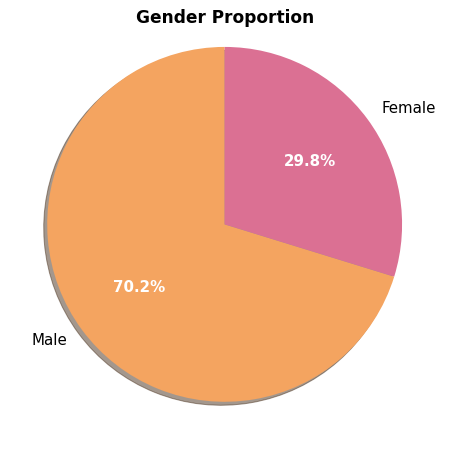

In [1390]:
# Visualizing gender proportion
fig, genderProp = plt.subplots()
percentage, label, chart = genderProp.pie(
        data["gender"].value_counts(),
        labels = ["Male", "Female"],
        autopct = "%1.1f%%", startangle = 90,
        colors = ["sandybrown", "palevioletred"],
        textprops = {"size" : 15,"color" : "black"},
        radius = 1.02,
        shadow = True)

plt.setp(chart, **{"color" : "white", "weight" :"bold", "fontsize" : 15})
plt.title("Gender Proportion", fontdict = {'fontsize': 17,
        'fontweight' : "bold",
        'color' : "black",
        'verticalalignment': 'baseline',
        'horizontalalignment': "center"
        }, y = 0.95)

plt.show()

We have quite imbalanced gender here, where male dominate over female.

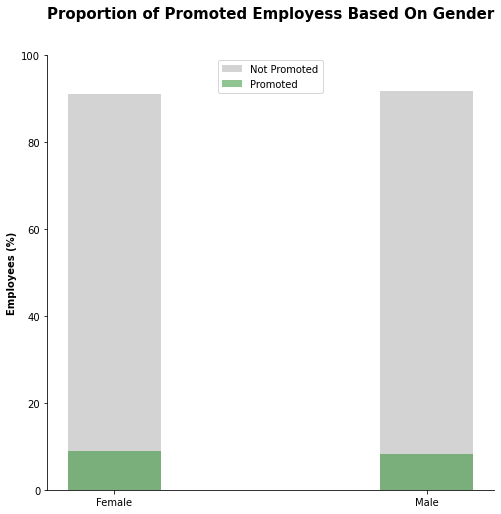

In [1141]:
# Correlation between gender and job promotion
genderProp = round((pd.crosstab(data["gender"], data["is_promoted"], normalize = "index") * 100), 1)

fig, ax = plt.subplots(figsize = (8, 8))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.bar(genderProp.index, genderProp[0],
       color = "lightgray",
       width = 0.3,
       linewidth = 1)

plt.bar(genderProp.index, genderProp[1],
       color = "forestgreen",
       width = 0.3,
       alpha = 0.5,
       linewidth = 1)
plt.legend(("Not Promoted", "Promoted"))
plt.title("Proportion of Promoted Employess Based On Gender", fontdict = {'fontsize': 15,
        'fontweight' : "bold",
        'color' : "black",
        'verticalalignment': 'baseline',
        'horizontalalignment': "center"
        }, y = 1.07)
plt.ylabel(
    "Employees (%)",
    fontdict = {
        "weight" : "bold",
        "size" : 10
    }
    )
ax.set_xticklabels(("Female", "Male"))
plt.ylim(0, 100)
plt.legend(("Not Promoted", "Promoted"), loc = 9)

plt.show()

Female has a slight higer percentage of being promoted (0.7% higher than male). However, this is not a significant value. We can say the company still equally promoted employees no matter what their gender is and thus we drop gender from our features.

In [1142]:
# Removes gender
data.drop("gender", 1, inplace = True)

## Recruitment Channel

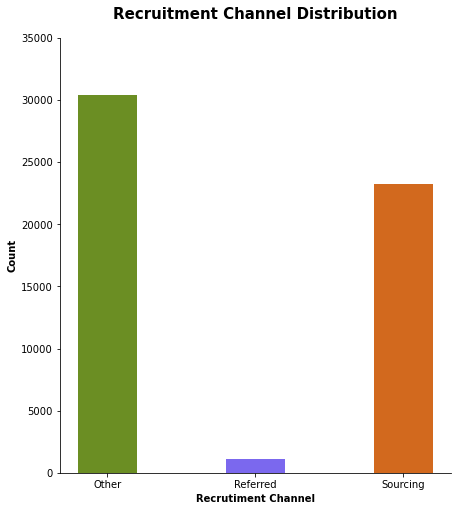

In [1391]:
# Distribution
temp = data.groupby("recruitment_channel").count()[["age"]]

fig, ax = plt.subplots(figsize = (7, 8))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.bar(temp.index, temp["age"], color = ["olivedrab", "mediumslateblue", "chocolate"], width = 0.4)
plt.title("Recruitment Channel Distribution", fontdict = {'fontsize': 15,
        'fontweight' : "bold",
        'color' : "black",
        'verticalalignment': 'baseline',
        'horizontalalignment': "center"
        }, y = 1.03)
plt.ylabel(
    "Count",
    fontdict = {
        "weight" : "bold",
        "size" : 10
    }
    )
plt.xlabel(
    "Recrutiment Channel",
    fontdict = {
        "weight" : "bold",
        "size" : 10
    }
    )
ax.set_xticklabels(("Other", "Referred", "Sourcing"))
plt.ylim(0, 35000)

plt.show()

It's normal that referred employees number is very low since a success of referencing new employee is determined by the employee (mediator) itself. **Ullman (1996) in Van Hoye (2013)** stated:

>"Employee referrals can be regarded as a specific kind of word-of-mouth communication, with current employees of the recruiting organization acting as the source of interpersonal employment information."

Thus this informal recruitment source / channel is not under the direct control of the organization / company. As a result the employee, who is referencing, will bear two kind of communications, **positive** and **negative** referrals --Van Hoye said it as "word-of-mouth"--. Uncontrollable source of information won't guarantee acceptance rate and hence make this type of recruitment channel unreliable --**in the context of acceptance rate**--. Besides, referral channel needs employees' will to promote and advertise company by their own resource compared to formal resource which has broader coverage. Formal recruitment channel (advertising, job fair, job sites) --**other** in this context-- has higher rate because of its controllable source of information and approach.

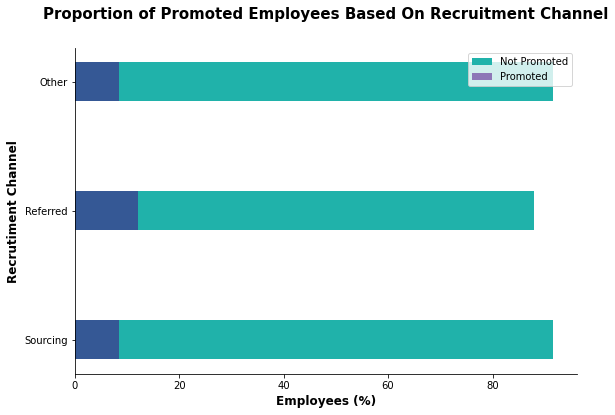

In [1392]:
# Correation between recruiment channel and job promotion
recProp = round((pd.crosstab(data["recruitment_channel"], columns = data["is_promoted"], normalize = "index") * 100), 1)

fig, ax = plt.subplots(figsize = (9, 6))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.barh(recProp.index, recProp[0],
       color = "lightseagreen",
       height = 0.3,
       linewidth = 1)

plt.barh(recProp.index, recProp[1],
       color = "indigo",
       height = 0.3,
       alpha = 0.5,
       linewidth = 1)
plt.legend(("Not Promoted", "Promoted"))
plt.title("Proportion of Promoted Employees Based On Recruitment Channel", fontdict = {'fontsize': 15,
        'fontweight' : "bold",
        'color' : "black",
        'verticalalignment': 'baseline',
        'horizontalalignment': "center"
        }, y = 1.07)
plt.xlabel(
    "Employees (%)",
    fontdict = {
        "weight" : "bold",
        "size" : 12
    }
    )
plt.ylabel(
    "Recrutiment Channel",
    fontdict = {
        "weight" : "bold",
        "size" : 12
    }
    )
ax.set_yticklabels(("Sourcing", "Referred", "Other"))

plt.show()

This fact supports **Weller et al. (2009), Williams et al. (1993), and Zottoli & Wanous (2000) findings in Van Hoye (2013)** that stated:

>"...employees recruited through informal sources such as employee referrals show higher job satisfaction, better job performance, and lower turnover than employees recruited through formal sources such as advertising."

This means referral employees are more reliable and have higher probability to develop. So it's not a surprise if they have higher chance to be promoted.

Reference:
- Van Hoye, Greet. 2013. *Recruiting Through Employee Referrals: An Examination of Employees’ Motives*. Belgium : Ghent University dalam Research Gate : Human Performance. Accessed through https://www.researchgate.net/publication/236143006_Recruiting_Through_Employee_Referrals_An_Examination_of_Employees%27_Motives.

## Number of Trainings

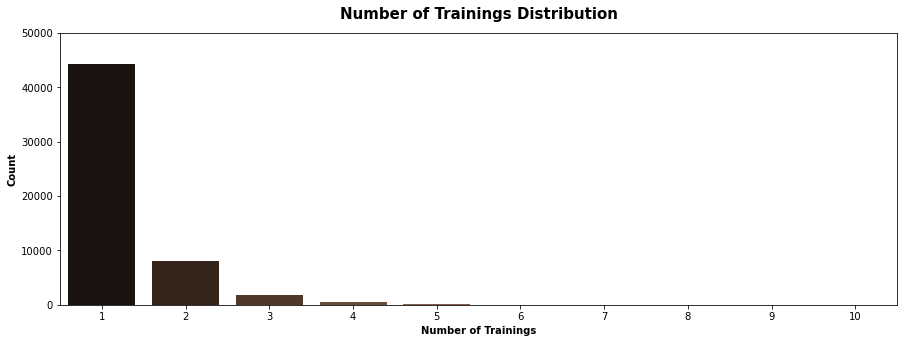

In [1393]:
# Distribution
plt.figure(figsize = (15, 5))
sns.countplot(data["no_of_trainings"], palette = "copper")
plt.title("Number of Trainings Distribution", fontdict = {'fontsize': 15,
        'fontweight' : "bold",
        'color' : "black",
        'verticalalignment': 'baseline',
        'horizontalalignment': "center"
        }, y = 1.03)
plt.xlabel(
    "Number of Trainings",
    fontdict = {
        "weight" : "bold",
        "size" : 10
    }
    )
plt.ylabel(
    "Count",
    fontdict = {
        "weight" : "bold",
        "size" : 10
    }
    )
plt.ylim(0, 50000)

plt.show()

Almost all employees had only taken 1 training.

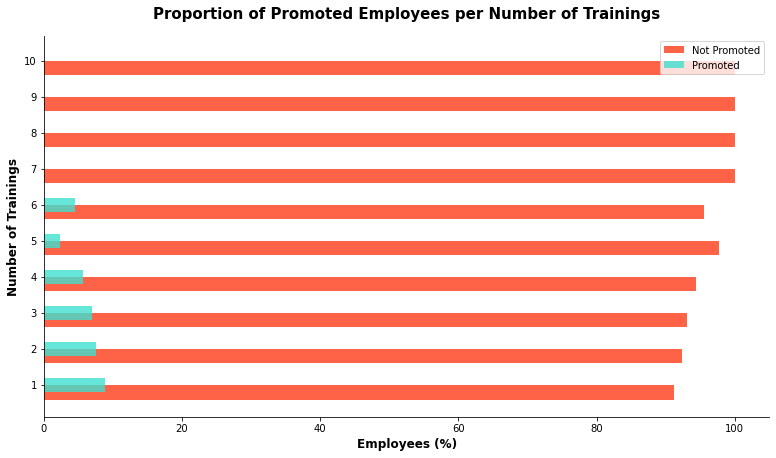

In [1394]:
# Correlation between number of trainings and job promotion
trainProp = round((pd.crosstab(data["no_of_trainings"], columns = data["is_promoted"], normalize = "index") * 100), 1)

fig, ax = plt.subplots(figsize = (13, 7))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.barh(trainProp.index - .2, width = trainProp[0],
       color = "tomato",
       height = 0.4,
       linewidth = 1)

plt.barh(trainProp.index, width = trainProp[1],
       color = "turquoise",
       height = 0.4,
       alpha = 0.8,
       linewidth = 1)
plt.legend(("Not Promoted", "Promoted"))
plt.title("Proportion of Promoted Employees per Number of Trainings", fontdict = {'fontsize': 15,
        'fontweight' : "bold",
        'color' : "black",
        'verticalalignment': 'baseline',
        'horizontalalignment': "center"
        }, y = 1.03)
plt.ylabel(
    "Number of Trainings",
    fontdict = {
        "weight" : "bold",
        "size" : 12
    }
    )
plt.xlabel(
    "Employees (%)",
    fontdict = {
        "weight" : "bold",
        "size" : 12
    }
    )
plt.yticks(([x for x in range(1, 11)]), ([x for x in trainProp.index]))

plt.show()

Increment in number of trainings causes drop of promoted employees proportion. The only one anomally exist on 5 and 6 trainings, where it slightly increases. It is believed that trainings are given to develop and increase employees'weakness. Therefore, the bad performance employee would get more trainings, whereas good performance employee would get less trainings. Employee who get 7 trainings and above has no chance of being promoted, and it most likely means his performance is very bad. Therefore, instead of using this variable, we can create a new binary portraying our main conclusion, which is **employees with 7 trainings and above doens't get a chance of being promoted**.

In [1395]:
# Create new binary feature
isTrainAbv6 = []
for x in data["no_of_trainings"]:
    if x > 6:
        isTrainAbv6.append(1)
    else:
        isTrainAbv6.append(0)
        
data["isTrainAbv6"] = isTrainAbv6

## Age


Skewness value :  1.01


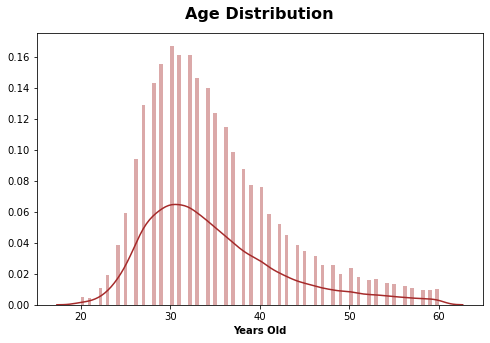

In [1396]:
# Distribution
print("\nSkewness value : ", round(skew(data["age"]), 2))

plt.figure(figsize = (8, 5))
sns.distplot(data["age"], bins = 100, color = "brown")
plt.title(
        "Age Distribution",
        fontdict = {"fontsize": 16,
        "fontweight" : "bold",
        "color" : "black",
        "verticalalignment": "baseline",
        "horizontalalignment": "center"
        },
        y = 1.03)
plt.xlabel(
    "Years Old",
    fontdict = {"weight" : "bold"
    })

plt.show()

Age has a moderate positive (right) skewed distribution. It's centralized in young - middle age employees, meanwhile elders are very rare and thus become outliers in the data.

There's not only one method to define outliers. Each of them are useful yet academically debatable, depends on what and who we read and believe in. People commonly use conservative methods such as IQR and "3 times standard deviation from mean range". But, **Leys et al. (2013)** on their article wrote that:

>"Unfortunately, three problems can be identified when using the mean as the central tendency indicator (Miller, 1991). Firstly, it assumes that the distribution is normal (outliers included). Secondly, the mean and standard deviation are strongly impacted by outliers. Thirdly, as stated by Cousineau and Chartier (2010), this method is very unlikely to detect outliers in small samples. Accordingly, this indicator is fundamentally problematic: It is supposed to guide our outlier detection but, at the same time, the indicator itself is altered by the presence of outlying values."

They suggest to use Median Absolute Deviation (MAD) because it is very insensitive to the presence of outliers and also totally immune to the sample size. **Oracle on one of their article** also say the same thing. It is believed more effective than the two methods, but there are several things that we must put on concern:

>"...but it can be too aggressive in classifying values that are not really extremely different. Also, if more than 50% of the data points have the same value, MAD is computed to be 0, so any value different from the residual median is classified as an outlier."

However, MAD method is still fairer in putting "outliers" as the real outliers rather than mean tendency method which is not aware of outliers existence in standard deviation calculation. Moreover, we know our numerical features are vary respectively (except **no_of_trainings**), so no need to worry about MAD aggressive way to define the value.

Thus, from now on we will use MAD to define outliers.

Reference:
- Leys, C. et al. 2013. *Detecting outliers: Do not use standard deviation around the mean, use absolute deviation around the median*. Journal of Experimental Social Psychology. Accessed through http://dx.doi.org/10.1016/j.jesp.2013.03.013.
- Oracle. *Outlier Detection Methods*. Accessed on November, 18th 2020 through https://docs.oracle.com/cd/E17236_01/epm.1112/cb_statistical/frameset.htm?ch07s02s10s01.html.

In [1397]:
# Defines MAD range
def mad_range(x):
    lower = np.median(x) - (3 * mad(x))
    upper = np.median(x) + (3 * mad(x))
    
    return (lower, upper)

In [1398]:
# Showing outliers
outliers = data[(data["age"] < mad_range(data["age"])[0]) | (data["age"] > mad_range(data["age"])[1])]
print("Total outliers : ", len(outliers), "data")
print("Outliers sample :")
display(outliers.sample(10))

Total outliers :  2852 data
Outliers sample :


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,eduInt,isTechLegal,isBelowReg,isTrainAbv6
22490,40142,HR,2,Bachelor's,m,other,1,55,2.0,6,0,0,52,0,1,0,0,0
43931,13591,Technology,13,Bachelor's,f,other,1,53,3.0,11,0,0,79,0,1,1,0,0
41949,13532,Legal,2,Master's & above,f,other,3,55,3.0,16,0,0,71,1,2,1,0,0
41271,38087,Procurement,2,Bachelor's,f,other,2,55,3.0,28,1,0,67,0,1,0,0,0
24757,57957,Sales & Marketing,22,Master's & above,m,sourcing,1,53,2.0,4,1,0,51,0,2,0,0,0
18454,65896,Technology,2,Bachelor's,f,other,1,60,3.0,18,0,0,75,0,1,1,0,0
38764,45844,Procurement,26,Master's & above,m,sourcing,1,52,5.0,15,1,0,74,0,2,0,1,0
6207,64540,Procurement,2,Master's & above,m,other,10,55,3.0,12,0,0,70,0,2,0,0,1
12689,47688,Operations,2,Bachelor's,m,other,2,56,5.0,4,0,0,61,0,1,0,0,0
6269,44265,Technology,7,Master's & above,m,sourcing,1,59,3.0,2,0,0,81,0,2,1,0,0


**Handling outliers**

We won't drop these outliers for three reasons:
- We don't limit our model based on employees' age. We will build a model that covers all employees no mater how old they are.
- It won't affect our result (only 5.2%).
- These outliers don't differ that much from normal values.
- These outliers are not an error, but natural / organic data.

But, we will create a new feature which is presenting age range. Besides make the model learn easier, this binning technique also removes outliers without actually removes them.

In [1399]:
# Binning age to remove outliers and classify the data better.
# Range is set to 3 years because it's the most appropriate number if we put work experience as the determinant.
# 3 years is believed the average year an employee can learn new things fully and thus can be labelled as "experienced employee".
# Just like we usually found on job sites that majority requires minimal of 3 years work experience to sit on "experienced" position.
ageRange, ageRangeInt, ar = [], [], range(data["age"].min(), data["age"].max(), 3)

for a in data["age"]:
    count = -1
    for i, r in enumerate(ar):
        count += 1
        try:
            if (r + count) <= a <= (ar[i + 1] + count):
                ageRange.append(f"{r + count} - {ar[i + 1] + count}")
                ageRangeInt.append(i)
                break
            elif (ar[i + 1] + count + 1) <= a <= (ar[i + 2] + count + 1):
                ageRange.append(f"{ar[i + 1] + count + 1} - {ar[i + 2] + count + 1}")
                ageRangeInt.append(i + 1)
                break
        except:
            ageRange.append(f"> {r + 1}")
            ageRangeInt.append(i + 1)
            break
                
data["ageRange"] = ageRange
data["ageRangeInt"] = ageRangeInt

In [1400]:
# New age distribution
print("New distribution :")
temp = round((pd.crosstab(data["ageRange"], columns = "Count (%)", normalize = "columns") * 100), 1)
temp.columns.name = ""
temp.index.name = "Age (Years Old)"
display(temp)

New distribution :


,Count (%)
Age (Years Old),
20 - 23,1.6
24 - 27,12.8
28 - 31,25.1
32 - 35,22.9
36 - 39,15.1
40 - 43,9.3
44 - 47,5.2
48 - 51,3.5
52 - 55,2.4


New distribution with age range still shows the same result, where employees are centralized in 28 - 35 years old.

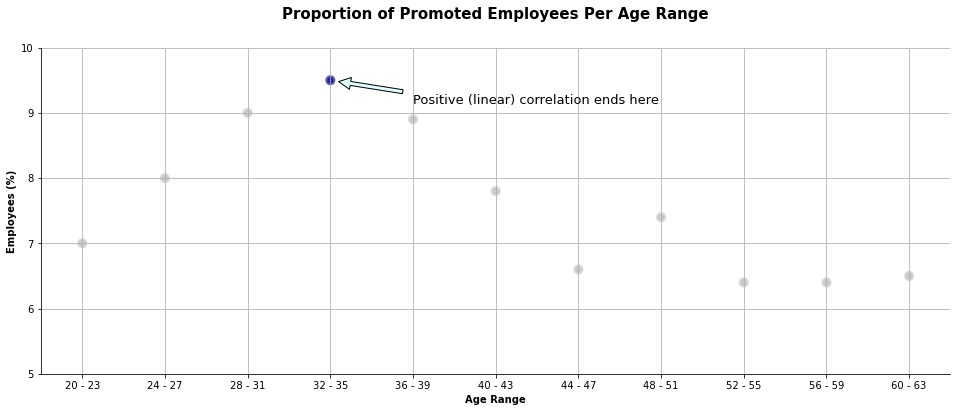

In [1401]:
# Correlation between age range and job promotion
ageProp = round((pd.crosstab(data["ageRange"], data["is_promoted"], normalize = "index") * 100), 1)

fig, ax = plt.subplots(figsize = (16.3, 6))
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.grid(True)
plt.scatter(ageProp.index, ageProp[1],
            color = ["silver", "silver", "silver", "navy", "silver", "silver", "silver", "silver", "silver", "silver", "silver"],
            linewidths = 4, alpha = 0.65)
plt.annotate("Positive (linear) correlation ends here",
            xy = ("32 - 35", 9.5),
            xytext = ("36 - 39", 9.1),
            fontsize = 13,
            arrowprops = {"facecolor" : "lightcyan", "shrink" : 0.1},
            horizontalalignment = "left", verticalalignment = 'bottom')
plt.title("Proportion of Promoted Employees Per Age Range", size = 15, weight = "bold", y = 1.07)
plt.xlabel("Age Range", size = 10, fontdict = {"weight" : "bold"})
plt.ylabel("Employees (%)", size = 10, fontdict = {"weight" : "bold"})
plt.ylim(5, 10)

plt.show()

32 - 35 years old group has the highest percentage of promoted employees, where the elders has the lowest. The most possible reasons for this phenomenon are:
- Younger employees tend to have short length of service (see **Handling missing values** part), whereas the elders tend to have longer service time. This means younger employees are sitting in low - middle position / level, thus still facing more position levels ahead. The elders on the contrary most likely sit on the middle - high level which is means there's fewer (or even no more) positions ahead. 
- The higher the level / position is, the harder it is to be promoted since it requires more skill (not only practical, but also managerial) and consideration, not to mention politics.

Age range has a positive correlation with job promotion in the scope of 20 - 35 years old. Entering 36 years old, the pattern becomes fluid and unpredictable. Hence, we won't use this variable.

In [1154]:
# Removes age, and age_range
data.drop(["age", "ageRange"], 1, inplace = True)

## Previous Year Rating

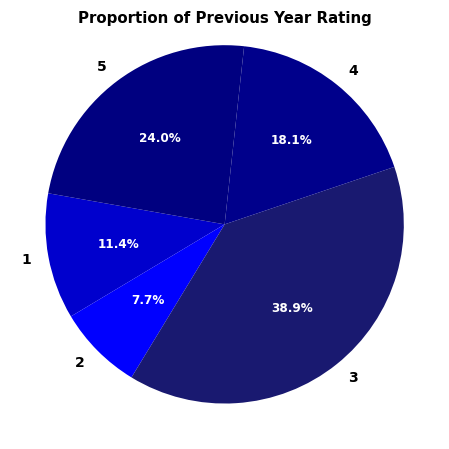

In [1402]:
# Distribution
temp = pd.crosstab(data["previous_year_rating"], columns = "count", normalize = "columns")
fig, ratProp = plt.subplots()
percentage, label, chart = ratProp.pie(
        temp["count"],
        labels = [1, 2, 3, 4, 5],
        autopct = "%1.1f%%",
        startangle = 170,
        colors = ["mediumblue", "blue", "midnightblue", "darkblue", "navy"],
        textprops = {"size" : 14,"color" : "black", "weight" : "bold"},
        radius = 1.03)

plt.setp(chart, **{"color" : "white", "weight" :"bold", "fontsize" : 12})
plt.title("Proportion of Previous Year Rating", fontdict = {'fontsize': 15,
        'fontweight' : "bold",
        'color' : "black",
        'verticalalignment': 'baseline',
        'horizontalalignment': "center"
        }, y = 0.95)

plt.show()

Most of the employess got mediocre rating last year, where almost a quarter of them got the best rating. This bring us a conclusion that company's last year performance was quite good.

In [1403]:
# Correlation between previous year rating and job promotion
temp = round((pd.crosstab(data["previous_year_rating"], data["is_promoted"], normalize = "index") * 100), 1)
temp.columns.name = ""
temp.columns = ["Not Promoted (%)", "Promoted (%)"]
temp.index.name = "Previous Year Rating"
print("Proportion of promoted employees based on previous year rating :")
display(temp)

Proportion of promoted employees based on previous year rating :


,Not Promoted (%),Promoted (%)
Previous Year Rating,,
1.0,98.6,1.4
2.0,95.7,4.3
3.0,93.2,6.8
4.0,92.0,8.0
5.0,83.6,16.4


There's a strong correlation between them (positive / linear correlation). Increment in previous year rating shows significant increment in promoted employees percentage. This means employee with higher previous year rating has higher chance to be promoted compared to those with lower rating.

## Length of Service


Skewness value :  1.74


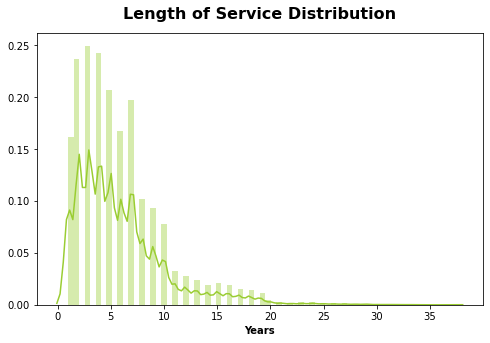

In [1404]:
# Distribution
print("\nSkewness value : ", round(skew(data["length_of_service"]), 2))

plt.figure(figsize = (8, 5))
sns.distplot(data["length_of_service"], bins = 70, color = "yellowgreen")
plt.title(
        "Length of Service Distribution",
        fontdict = {"fontsize": 16,
        "fontweight" : "bold",
        "color" : "black",
        "verticalalignment": "baseline",
        "horizontalalignment": "center"
        },
        y = 1.03)
plt.xlabel(
    "Years",
    fontdict = {"weight" : "bold"
    })

plt.show()

This variables has a severe positive (right) skewed distribution. Employees are centralized on low - medium length of service. Loyal and senior employees on the other hand are very low.

In [1405]:
# Showing outliers
outliers = data[(data["length_of_service"] < mad_range(data["length_of_service"])[0]) | (data["length_of_service"] > mad_range(data["length_of_service"])[1])]
print("Total outliers : ", len(outliers), "data")
print("Outliers sample :")
display(outliers.sample(10))

Total outliers :  3489 data
Outliers sample :


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,eduInt,isTechLegal,isBelowReg,isTrainAbv6,ageRange,ageRangeInt
24963,35991,Procurement,2,Bachelor's,m,sourcing,2,60,3.0,27,0,0,70,0,1,0,0,0,60 - 63,10
48257,34745,Operations,13,Bachelor's,m,sourcing,1,45,3.0,19,0,0,63,0,1,0,0,0,44 - 47,6
21040,52067,Sales & Marketing,2,Bachelor's,f,other,1,43,2.0,18,0,0,48,0,1,0,0,0,40 - 43,5
42822,45744,Procurement,17,Master's & above,m,sourcing,1,39,4.0,15,1,0,69,0,2,0,0,0,36 - 39,4
43343,36329,Sales & Marketing,16,Bachelor's,m,other,1,46,4.0,17,0,0,46,0,1,0,1,0,44 - 47,6
3259,63381,HR,13,Master's & above,f,other,1,44,1.0,15,0,0,45,0,2,0,0,0,44 - 47,6
23157,58505,Operations,22,Bachelor's,m,sourcing,1,44,5.0,14,1,0,61,0,1,0,0,0,44 - 47,6
11207,31011,Operations,2,Master's & above,f,sourcing,1,41,3.0,15,1,0,60,0,2,0,0,0,40 - 43,5
7487,10093,Technology,2,Bachelor's,m,sourcing,1,51,4.0,16,0,0,83,0,1,1,0,0,48 - 51,7
11805,10366,Procurement,7,Master's & above,m,sourcing,3,48,2.0,19,1,0,73,1,2,0,0,0,48 - 51,7


**Handling outliers**

Just like age, we won't drop these outliers. Approach taken also follows what've done before.

In [1406]:
# Binning length of service to remove outliers and classify the data better.
# We want to divide it into per 2 years gap because it is believed the most appropriate range.
# Take an example of 5 years of gap, therefore 1 year of service employee will be binned to 1 - 6.
# This is so not realistic and fair since entry level have different loyalty to the company than those who have worked for 5 - 6 years.
# On the other hand, difference in level of loyalty for 1 and 3 years employee still can be tolerated. 
# Besides loyalty, length of service alos affect experience, skill, and performance of the employee.
# On many job sites for example, company often put 1 to 3 years of experience as a requirement for the same position.
serviceRange, serviceRangeInt, sr = [], [], range(data["length_of_service"].min(), data["length_of_service"].max(), 2)

for a in data["length_of_service"]:
    count = -1
    for i, r in enumerate(sr):
        count += 1
        try:
            if (r + count) <= a <= (sr[i + 1] + count):
                serviceRange.append(f"{r + count} - {sr[i + 1] + count}")
                serviceRangeInt.append(i)
                break
            elif (sr[i + 1] + count + 1) <= a <= (sr[i + 2] + count + 1):
                serviceRange.append(f"{sr[i + 1] + count + 1} - {sr[i + 2] + count + 1}")
                serviceRangeInt.append(i + 1)
                break
        except:
            serviceRange.append(f"> {r + 1}")
            serviceRangeInt.append(i + 1)
            break
                
data["serviceRange"] = serviceRange
data["serviceRangeInt"] = serviceRangeInt

In [1407]:
# New length of service distribution
print("New distribution :")
        
temp = round((pd.crosstab(data["serviceRangeInt"], columns = "Count (%)", normalize = "columns") * 100), 3)
temp.columns.name = "Length of Service (Years)"
temp.index = [x for x in data.sort_values("serviceRangeInt")["serviceRange"].unique()]
display(temp)

New distribution :


Length of Service (Years),Count (%)
1 - 3,33.324
4 - 6,31.751
7 - 9,20.185
10 - 12,7.121
13 - 15,3.337
16 - 18,2.503
19 - 21,0.976
22 - 24,0.358
25 - 27,0.234
28 - 30,0.131


Majority of employees are quite new. Loyal and senior employees on the other hand are very rare. This percentage also indicates possibility of a high turnover.

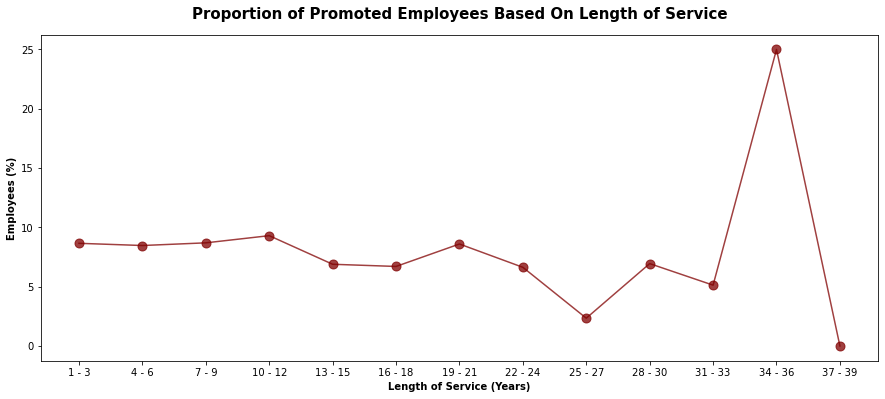

In [1408]:
# Correlation between service range and job promotion
temp = pd.crosstab(data["serviceRangeInt"], data["is_promoted"], normalize = "index") * 100

plt.figure(figsize = (15, 6))
plt.plot(temp[1], color = "maroon", alpha = 0.75, marker = "o", markersize = 9)
plt.title(
        "Proportion of Promoted Employees Based On Length of Service", fontdict = {'fontsize': 15,
        'fontweight' : "bold",
        'color' : "black",
        'verticalalignment': 'baseline',
        'horizontalalignment': "center"
        }, y = 1.03
    )
plt.xlabel(
    "Length of Service (Years)",
    fontdict = {
        "weight" : "bold",
        "size" : 10
    }
    )
plt.ylabel(
    "Employees (%)",
    fontdict = {
        "weight" : "bold",
        "size" : 10
    }
    )
plt.xticks(([x for x in range(13)]), ([x for x in data.sort_values("serviceRangeInt")["serviceRange"].unique()]))

plt.show()

Because of linear correlation between **age** and **length_of_service**, this finding also correlates with age's (refer to explanation on "age"). The graph is pretty fluctuate but indicates a declining pattern entering 19 - 21 years of service. Thus, employees with short - medium length of service has higher chance of being promoted than very seniors employees. 

The high percentage in 34 - 36 years of service indicates **1 promotion of 3 available employees**.

## KPIs Achievement

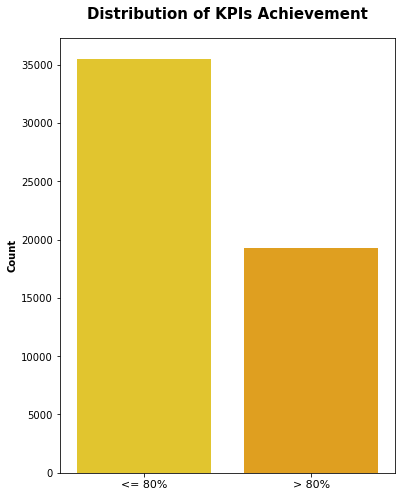

In [1409]:
# Distribution
fig, ax = plt.subplots(figsize = (6, 8))
sns.countplot(data["KPIs_met >80%"], palette = "Wistia")
plt.title(
        "Distribution of KPIs Achievement", fontdict = {'fontsize': 15,
        'fontweight' : "bold",
        'color' : "black",
        'verticalalignment': 'baseline',
        'horizontalalignment': "center"
        }, y = 1.03
    )
plt.xlabel("")
plt.ylabel(
    "Count",
    fontdict = {
        "weight" : "bold",
        "size" : 10
    }
    )
ax.set_xticklabels(("<= 80%", "> 80%"), fontdict = {"size" : 11})

plt.show()

Only a few employees had brilliant KPIs score.

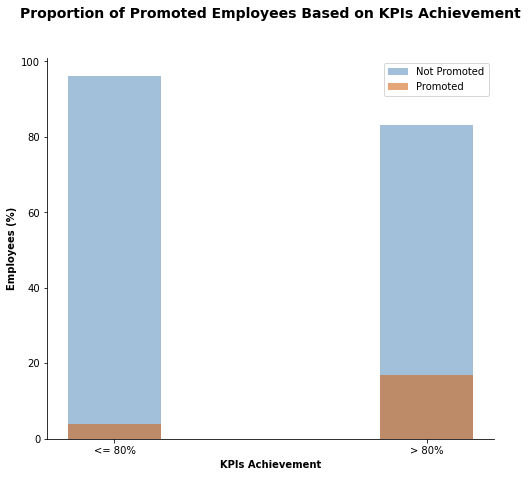

In [1410]:
# Correlation between KPIs achievement and job promotion
temp = (pd.crosstab(data["KPIs_met >80%"], data["is_promoted"], normalize = "index") * 100)
temp.index = ["<= 80%", "> 80%"]

fig, ax = plt.subplots(figsize = (8, 7))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.bar(temp.index, temp[0],
       color = "steelblue",
       alpha = 0.5,
       width = 0.3,
       linewidth = 1)

plt.bar(temp.index, temp[1],
       color = "chocolate",
       width = 0.3,
       alpha = 0.6,
       linewidth = 1)
plt.legend(("Not Promoted", "Promoted"))
plt.title("Proportion of Promoted Employees Based on KPIs Achievement", fontdict = {'fontsize': 14,
        'fontweight' : "bold",
        'color' : "black",
        'verticalalignment': 'baseline',
        'horizontalalignment': "center"
        }, y = 1.09)
plt.ylabel(
    "Employees (%)",
    fontdict = {
        "weight" : "bold",
        "size" : 10
    }
    )
plt.xlabel(
    "KPIs Achievement",
    fontdict = {
        "weight" : "bold",
        "size" : 10
    }
    )

plt.show()

Employees with KPIs score above 80% has a higher chance of being promoted. This is make sense since KPI indicates employee's performance during certain time and also acts as performance report for the management. Company of course prefer a good performance employee to be entrusted bigger responsibility.

## Winning Awards

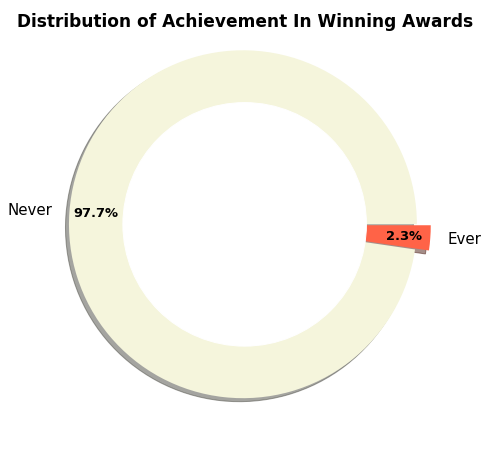

In [1411]:
# Distribution
fig, awdProp = plt.subplots()
innerCircle = plt.Circle((0, 0), 0.7, color = "white")

plt.rcParams["figure.figsize"] = (8, 8)
percentage, label, chart = awdProp.pie(
        data.groupby("awards_won?").count()["education"],
        colors = ["beige", "tomato"],
        labels = ["Never", "Ever"],
        shadow = True,
        textprops = {"size" : 15,"color" : "black", "weight" : "normal"},
        radius = 1,
        autopct = "%1.1f%%",
        labeldistance = 1.1,
        pctdistance = 0.85,
        explode = (.01, 0.07)
       )
plt.gcf().gca().add_artist(innerCircle)
plt.setp(chart, **{"color" : "black", "weight" :"bold", "fontsize" : 13})
plt.title("Distribution of Achievement In Winning Awards", fontdict = {'fontsize': 17,
        'fontweight' : "bold",
        'color' : "black",
        'verticalalignment': 'baseline',
        'horizontalalignment': "center"
        }, y = 0.94)

plt.show()

Almost all employees never won awards before.

In [1412]:
# Correlation between winning awards and job promotion
print("Proportion of promoted employees per awards achievement :")
temp = round((pd.crosstab(data["awards_won?"], data["is_promoted"], normalize = "index") * 100), 1).rename(columns = {
    0 : "Not Promoted", 1 : "Promoted"
})
temp.columns.name = ""
temp.index.name = "Awards Won?"
temp.index = ["Never", "Ever"]
display(temp)

Proportion of promoted employees per awards achievement :


,Not Promoted,Promoted
Never,92.3,7.7
Ever,56.0,44.0


Turns out winning awards give a big impact of promotion decision. Almost half of employees who have won awards get promoted. If they never won, then there's only a very small chance of getting promoted.

## Average Training Score


Skewness value :  0.45


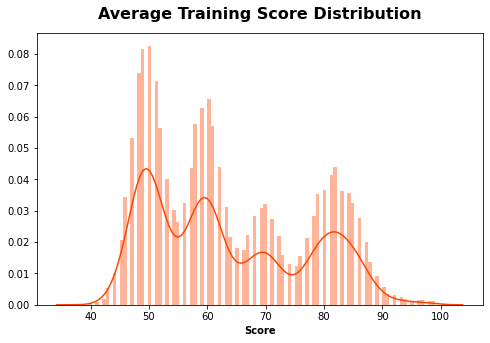

In [1413]:
# Distribution
print("\nSkewness value : ", round(skew(data["avg_training_score"]), 2))

plt.figure(figsize = (8, 5))
sns.distplot(data["avg_training_score"], bins = 100, color = "orangered")
plt.title(
        "Average Training Score Distribution",
        fontdict = {"fontsize": 16,
        "fontweight" : "bold",
        "color" : "black",
        "verticalalignment": "baseline",
        "horizontalalignment": "center"
        },
        y = 1.03)
plt.xlabel(
    "Score",
    fontdict = {"weight" : "bold"
    })

plt.show()

The distribution forms a multimodal, but has a normal skewness value. This means average training score distributed unevenly, especially in the middle range. Increment in average training score tends to lead into drops of total employees.

In [1414]:
# Showing outliers
outliers = data[(data["avg_training_score"] < mad_range(data["avg_training_score"])[0]) | (data["avg_training_score"] > mad_range(data["avg_training_score"])[1])]
print("Total outliers : ", len(outliers), "data")

Total outliers :  0 data


No outliers were found.

In [1415]:
# Binning average training score into 10 points gap categories to maximize model later
tScoreRange, tr = [], [y for y in range(data["avg_training_score"].min(), data["avg_training_score"].max(), 10)]

for z in data["avg_training_score"]:
    if tr[0] <= z <= tr[1]:
        tScoreRange.append(0)
    elif tr[1] + 1 <= z <= tr[2]:
        tScoreRange.append(1)
    elif tr[2] + 1 <= z <= tr[3]:
        tScoreRange.append(2)
    elif tr[3] + 1 <= z <= tr[4]:
        tScoreRange.append(3)
    elif tr[4] + 1 <= z <= tr[5]:
        tScoreRange.append(4)
    else:
        tScoreRange.append(5)

data["avgTrainRange"] = tScoreRange

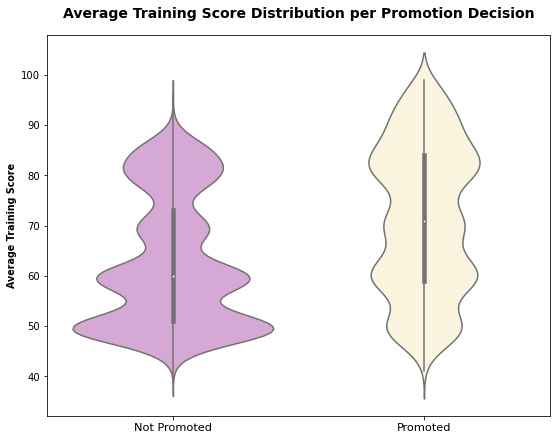

In [1416]:
# Correlation between average training score and job promotion
fig, ax = plt.subplots(figsize = (9, 7))
sns.violinplot(data["is_promoted"], data["avg_training_score"], palette = ["plum", "cornsilk"])
plt.title("Average Training Score Distribution per Promotion Decision", fontdict = {'fontsize': 14,
        'fontweight' : "bold",
        'color' : "black",
        'verticalalignment': 'baseline',
        'horizontalalignment': "center"
        }, y = 1.03)
plt.ylabel(
    "Average Training Score",
    fontdict = {
        "weight" : "bold",
        "size" : 9.6
    }
    )
plt.xlabel(
    "")
ax.set_xticklabels(("Not Promoted", "Promoted"), fontdict = {"size" : 11.3})


plt.show()

Higher average training score could guarantee an employee to be promoted rather than lower score. This can be seen from the section starting on 85 and above, which is wider in promoted employees group. Meanwhile there's **very high** probability to be not promoted if an employee got a very low score.

In [1425]:
# Save for modelling
data.to_csv("./fullprocesseddata.csv", index = False)

# Conclusion

- Level of education has a linear correlation with promotion, except for Legal and Technology Department. Meanwhile, number of trainings has negative correlation and indicates how bad employee's performance is.
- Department has an impact to its employee promotion rate, but **only** if we combine it with level of education.
- Previous year rating, winning awards, and KPI achievement are the most determinant considerations when promoting employees.
- Elders tend to have lower chance compared to young - medium age. This phenomenon correlates with job level / position and length of service time.
- Senior employees tend to have lower chance compared to freshers - medium employees. It is an impact of fewer level / job positions left on higher level. Old and senior employees are believed to most likely sit on high position, so the chance of going into next position is getting smaller. 
- Referred employees are getting more promotion exposure than other recruitment channel. This is believed because of their better performance, higher satisfaction, and lower turnover which are influenced by the informal recruitment and approach itself.
- Gender doesn't influenced job promotion, meanwhile age has a certain pattern for certain scope of age group. However, it fails to capture the data wholly.